In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
b=20
a=1

In [2]:
def f(x1, x2):
    return (a + 1 - x1)**2 + b * (x2 - x1**2)**2

def grad_x1(x1, x2):
    return -2 * (a + 1 - x1) - 4 * b * x1 * (x2 - x1**2)

def grad_x2(x1, x2):
    return 2 * b * (x2 - x1**2)

def grad_norm(x1, x2):
    return np.sqrt(grad_x1(x1, x2)**2 + grad_x2(x1, x2)**2)

In [4]:
def grad_x1_x1(x1,x2):
    return 2- 4*b*(x2-x1**2)+8*b*x1*x1
def grad_x1_x2(x1,x2):
    return -4*b*x1
def grad_x2_x2(x1,x2):
    return 2*b
def  grad_x2_x1(x1,x2):
    return -4*b*x1
def hessian (x1,x2):
    return np.array ([[grad_x1_x1(x1,x2),grad_x1_x2(x1,x2)],
                   [grad_x2_x1(x1,x2),grad_x2_x2(x1,x2)]])

In [12]:
def inverse_hessian(x1, x2):
    
    a = grad_x1_x1(x1, x2)
    b_ = grad_x1_x2(x1, x2)
    c = grad_x2_x1(x1, x2)
    d = grad_x2_x2(x1, x2)

    
    det = a * d - b_ * c

    if det == 0:
        raise ValueError("Hessian is singular, inverse cannot be computed.")

    
    inv_hessian = (1 / det) * np.array([[d, -b_],
                                        [-c, a]])
    return inv_hessian
def grad(x1,x2):
    return np.array([[grad_x1(x1,x2)],
                    [grad_x2(x1,x2)]])

done
done
done
done
done
done
done
done
done
done
done
done
Tolerance   Minimizer (x1, x2)            Function Value      Iterations  
1.0e-01     (1.998574, 3.994298)          0.000002            5           
1.0e-02     (1.998574, 3.994298)          0.000002            5           
1.0e-03     (2.000000, 3.999998)          0.000000            6           
1.0e-04     (2.000000, 4.000000)          0.000000            7           
1.0e-05     (2.000000, 4.000000)          0.000000            7           
1.0e-06     (2.000000, 4.000000)          0.000000            7           
1.0e-07     (2.000000, 4.000000)          0.000000            7           
1.0e-08     (2.000000, 4.000000)          0.000000            7           
1.0e-09     (2.000000, 4.000000)          0.000000            7           
1.0e-10     (2.000000, 4.000000)          0.000000            7           
1.0e-11     (2.000000, 4.000000)          0.000000            7           
1.0e-12     (2.000000, 4.000000)        

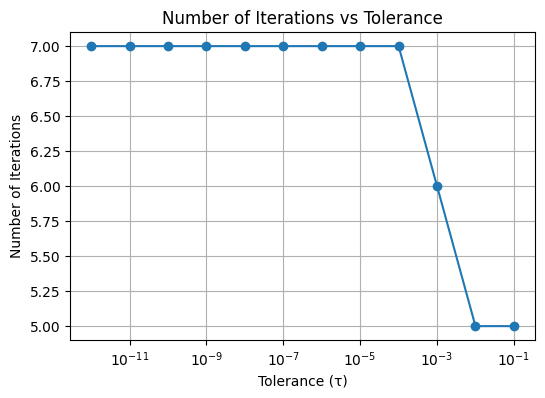

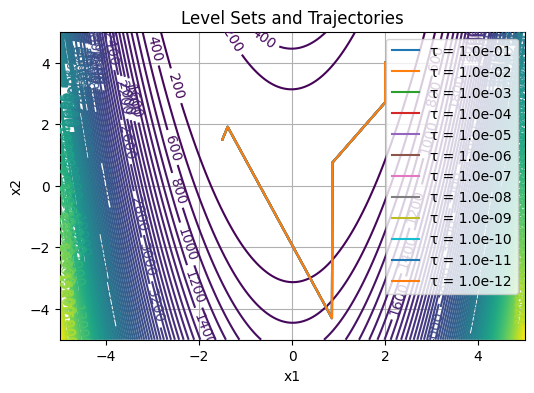

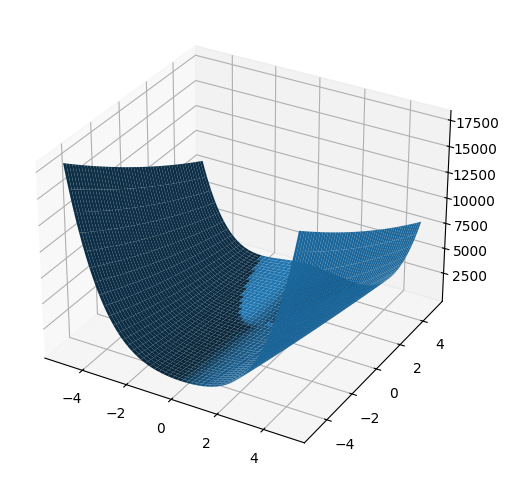

In [16]:
nita=0.001
tau=[10**(-p) for p in range(1,13)]
trajectories = {}
results=[]
for t in tau:
    x1,x2=-1.5,1.5
    k=0
    trajectory = [(x1, x2)]
    while grad_norm(x1,x2)>t:
        x = np.array([[x1], [x2]])
        grad_vector = grad(x1, x2)
        hessian_inv = inverse_hessian(x1, x2)
        x = x - np.matmul(hessian_inv, grad_vector)
        x1, x2 = x.flatten()
        k+=1
        trajectory.append((x1, x2))
    print('done')
    results.append((t, (x1, x2), f(x1, x2), k))
    trajectories[t] = trajectory
print(f"{'Tolerance':<12}{'Minimizer (x1, x2)':<30}{'Function Value':<20}{'Iterations':<12}")
for tau, (x_min, y_min), f_val, iters in results:
    
    minimizer_str = f"({x_min:.6f}, {y_min:.6f})"
    print(f"{tau:<12.1e}{minimizer_str:<30}{f_val:<20.6f}{iters:<12}")
tolerance_vals = [res[0] for res in results]
iteration_vals = [res[3] for res in results]

plt.figure(figsize=(6, 4))
plt.plot(tolerance_vals, iteration_vals, marker='o')
plt.xscale('log')
plt.xlabel('Tolerance (τ)')
plt.ylabel('Number of Iterations')
plt.title('Number of Iterations vs Tolerance')
plt.grid(True)
plt.show()


x = np.linspace( - 5,  5, 400)
y = np.linspace( - 5,  5, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.figure(figsize=(6, 4))
contour=plt.contour(X, Y, Z, levels=100, cmap='viridis')
plt.clabel(contour,inline=True)
for tau, traj in trajectories.items():
    traj = np.array(traj)
    plt.plot(traj[:, 0], traj[:, 1], label=f"τ = {tau:.1e}")
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Level Sets and Trajectories')
plt.legend()
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')  

ax.plot_surface(X, Y, Z)  

plt.show()  